<a href="https://colab.research.google.com/github/gityag/DSA/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import PIL
from PIL import Image
from IPython.display import Image, display
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/.shortcut-targets-by-id/1jFgwCKNtKSeDkWhZHi7du5qr835eaIvE/kaggle


In [ ]:
!ls

kaggle.json  musicnet  musicnet_metadata.csv  musicnet_midis  musicnet.npz


In [ ]:
import time
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


input_directory = './musicnet/musicnet/train_data'

output_directory = './musicnet/musicnet/spectrograms_train'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all .wav files in the input directory
audio_files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]

def generate_spectrogram(start, end):
    for i in range(start, min(end, len(audio_files))):
        audio_file = audio_files[i]

        # Load the .wav audio file
        audio_path = os.path.join(input_directory, audio_file)
        y, sr = librosa.load(audio_path)

        # Generate the spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

        # Save the spectrogram as an image
        spectrogram_file = os.path.splitext(audio_file)[0] + '.jpg'
        output_path = os.path.join(output_directory, spectrogram_file)

        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()

        print(f'Spectrogram conversion completed for {audio_file}.')

KeyboardInterrupt: ignored

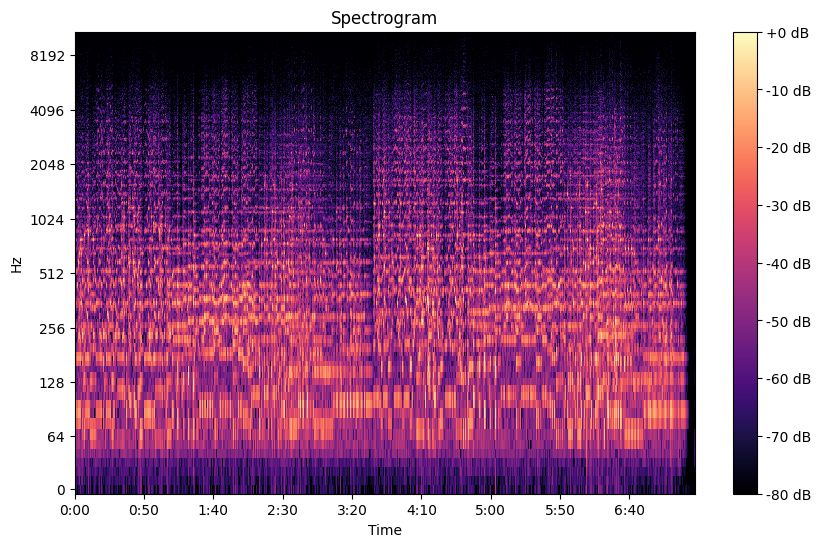

In [ ]:
# Generate spectrograms for the specified range of .wav files
generate_spectrogram(0, 5)

In [ ]:
generate_spectrogram(5,10)

In [ ]:
generate_spectrogram(10,15)

In [ ]:
generate_spectrogram(15,20)

KeyboardInterrupt: ignored

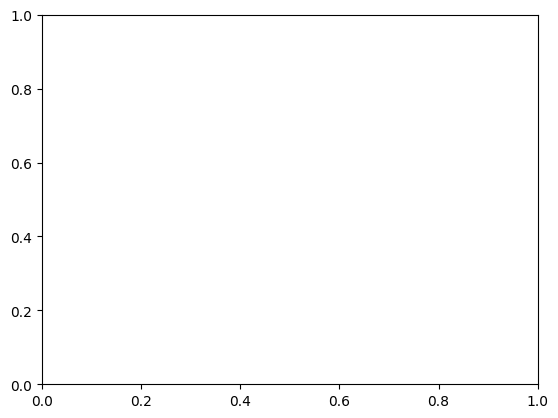

In [ ]:
#For test data
# Replace 'input_directory' with the path to the directory containing your audio files
input_directory = './musicnet/musicnet/test_data'

# Replace 'output_directory' with the path to the directory where you want to save the spectrogram images
output_directory = './musicnet/musicnet/spectrograms_test'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all .wav files in the input directory
audio_files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]

# Set the batch size
batch_size = 5
spectrogram_arrays = []
# Process the audio files in batches
for i in range(0, len(audio_files), batch_size):
    batch = audio_files[i:i + batch_size]

    for audio_file in batch:
        # Load the .wav audio file
        audio_path = os.path.join(input_directory, audio_file)
        y, sr = librosa.load(audio_path)

        # Generate the spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        spectrogram_array = np.array(D)
        spectrogram_arrays.append(spectrogram_array)
        # Create a subdirectory for each batch
        # batch_output_directory = os.path.join(output_directory, f'batch_{i // batch_size}')
        # os.makedirs(batch_output_directory, exist_ok=True)

        # Save the spectrogram as an image
        spectrogram_file = os.path.splitext(audio_file)[0] + '.jpg'
        output_path = os.path.join(output_directory, spectrogram_file)

        # plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, sr=sr)
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        fig.savefig(output_path, bbox_inches='tight', pad_inches=0)
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.savefig(output_path, bbox_inches='tight')
        # plt.close()
    print(f'Spectrogram conversion completed for {batch_size} audio files.')
print(spectrogram_arrays)

In [63]:
output_directory = './musicnet/musicnet/spectrograms_test'
image_files = [f for f in os.listdir(output_directory) if f.endswith('.jpg')]

# Initialize an empty list to store spectrogram arrays
spectrogram_arrays = []
from PIL import Image
for image_file in image_files:
  image_path = os.path.join(output_directory, image_file)
    # Open the image using Pillow (PIL)
  image1 = Image.open(image_path)

    # Convert the image to a NumPy array
  spectrogram_array = np.array(image1)


    # Append the array to the list
  spectrogram_arrays.append(spectrogram_array)

print(spectrogram_arrays)

[array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 2, 0],
        [0, 0, 0],
        [8, 0, 3],
        ...,
        [0, 0, 4],
        [0, 0, 5],
        [1, 0, 5]],

       [[0, 2, 0],
        [0, 0, 0],
        [8, 0, 3],
        ...,
        [0, 0, 2],
        [0, 0, 4],
        [0, 0, 4]],

       [[0, 2, 0],
        [0, 0, 0],
        [9, 0, 3],
        ...,
        [0, 1, 2],
        [0, 0, 4],
        [0, 0, 4]]], dtype=uint8), array([[[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2]],

       [[  0,   0,   2],
        

Converting into Piano Roll

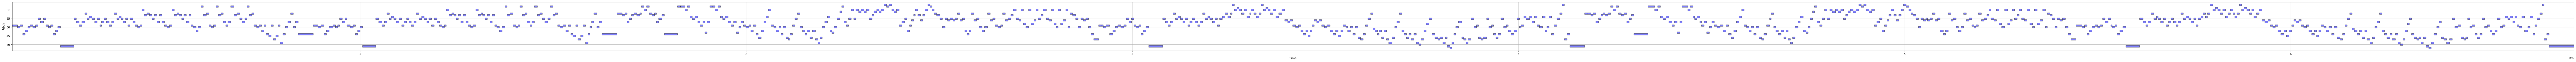

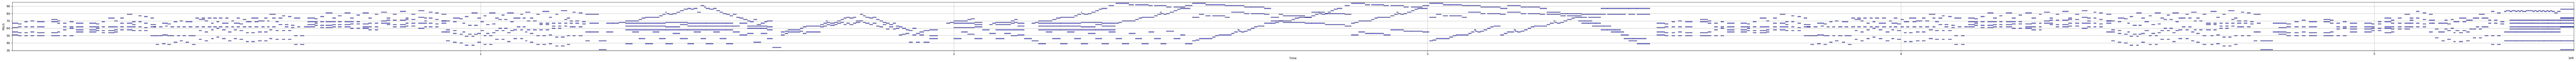

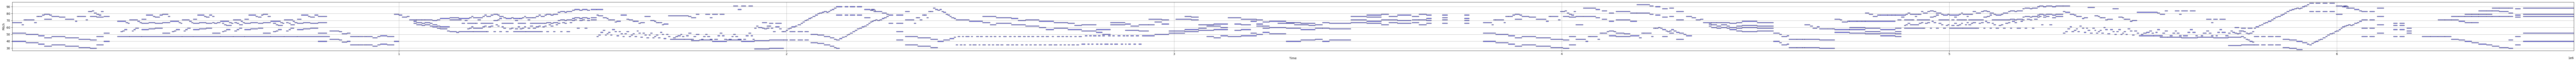

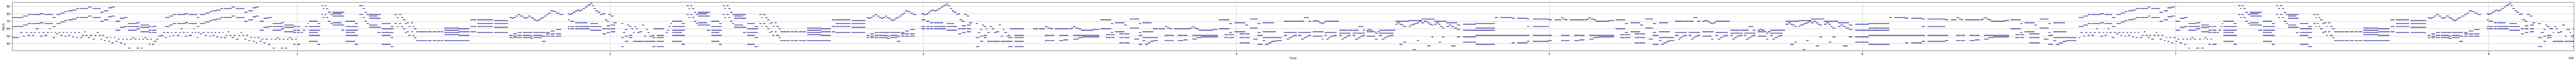

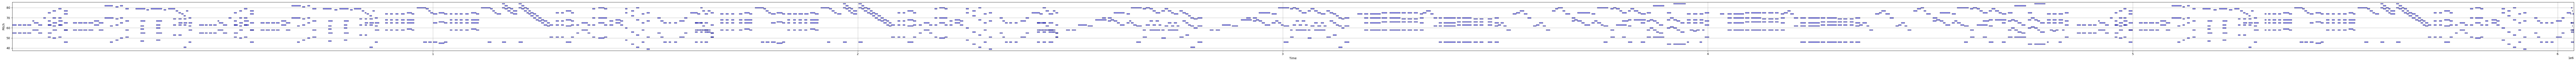

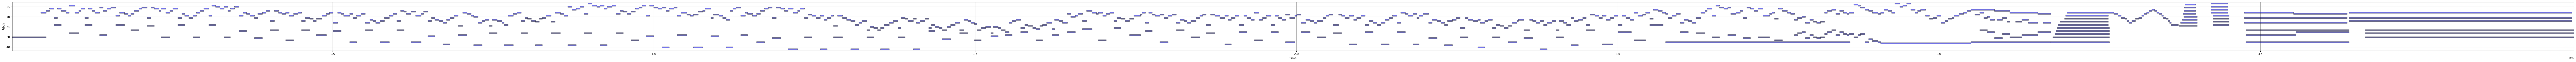

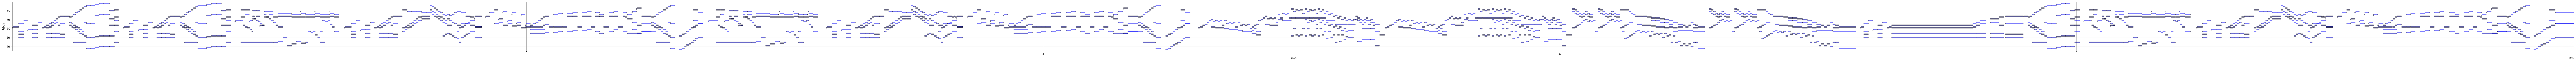

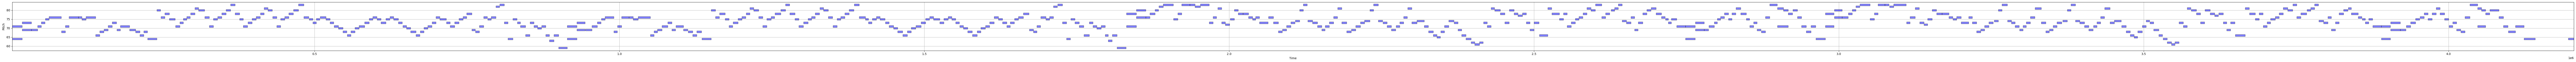

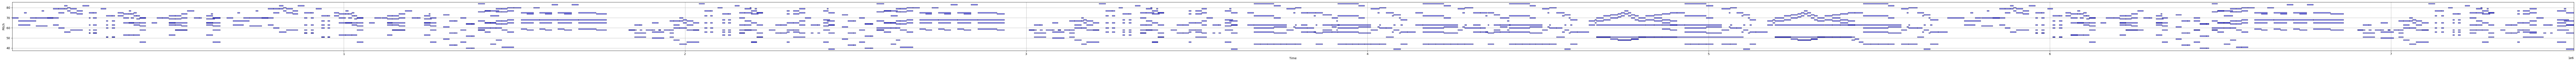

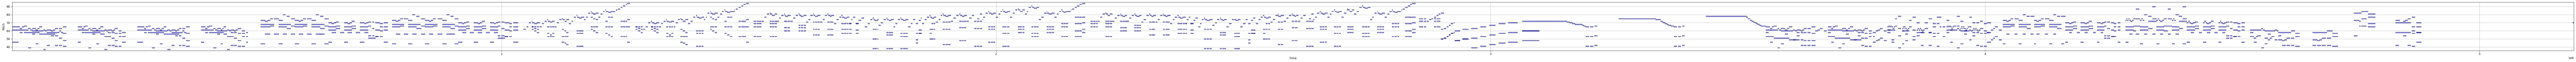

[[[99294, 6656, 51, 0.5], [105950, 6656, 51, 0.5], [112606, 6656, 50, 0.5], [119262, 6656, 51, 0.5], [125918, 6656, 46, 0.5], [132574, 6656, 48, 0.5], [139230, 6144, 50, 0.5], [145374, 6656, 51, 0.5], [152030, 7680, 50, 0.5], [159710, 5632, 51, 0.5], [165342, 7168, 55, 0.5], [172510, 7680, 53, 0.5], [180190, 6144, 55, 0.5], [186334, 6656, 51, 0.5], [192990, 5632, 50, 0.5], [198622, 6656, 51, 0.5], [205278, 6144, 46, 0.5], [211422, 5120, 48, 0.5], [216542, 7680, 50, 0.5], [224222, 34816, 39, 0.5], [259038, 6144, 55, 0.5], [265182, 7168, 53, 0.5], [272350, 6656, 51, 0.5], [279006, 7680, 53, 0.5], [286686, 6144, 58, 0.5], [292830, 5632, 55, 0.5], [298462, 6656, 56, 0.5], [305118, 7168, 55, 0.5], [312286, 6656, 53, 0.5], [318942, 6656, 55, 0.5], [325598, 4608, 51, 0.5], [330206, 6656, 53, 0.5], [336862, 6144, 55, 0.5], [343006, 7168, 53, 0.5], [350174, 6144, 51, 0.5], [356318, 6144, 53, 0.5], [362462, 7168, 58, 0.5], [369630, 6143, 55, 0.5], [375773, 5632, 56, 0.5], [381405, 5121, 55, 0.5]

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Directory containing test labels CSV files
test_labels_directory = './musicnet/musicnet/test_labels'

# Function to convert CSV data to the expected format
def csv_to_list(data):
    score = []
    for _, row in data.iterrows():
        start = row['start_time']
        duration = row['end_time'] - row['start_time']
        pitch = row['note']
        velocity = 0.5  # Adjust as needed
        score.append([start, duration, pitch, velocity])
    return score

# Function to visualize the piano roll
def visualize_piano_roll(score, xlabel='Time', ylabel='Pitch', colors='blue',
                         figsize=(120, 3), ax=None):
    fig = None
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    pitch_min = min(note[2] for note in score)
    pitch_max = max(note[2] for note in score)
    time_min = min(note[0] for note in score)
    time_max = max(note[0] + note[1] for note in score)

    for start, duration, pitch, velocity in score:
        rect = patches.Rectangle((start, pitch - 0.5), duration, 1, linewidth=1,
                                 edgecolor='k', facecolor=colors, alpha=velocity)
        ax.add_patch(rect)

    ax.set_ylim([pitch_min - 1.5, pitch_max + 1.5])
    ax.set_xlim([time_min, time_max])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
    ax.set_axisbelow(True)

    if fig is not None:
        plt.tight_layout()

    return fig, ax

# List to store scores from all CSV files
all_scores = []

# Iterate through CSV files in the directory
for filename in os.listdir(test_labels_directory):
    if filename.endswith(".csv"):
        # Load the CSV data
        data = pd.read_csv(os.path.join(test_labels_directory, filename))

        # Convert the CSV data to the expected format
        score = csv_to_list(data)

        # Visualize the piano roll if needed
        fig, ax = visualize_piano_roll(score, colors="blue", figsize=(120, 3))
        plt.show()

        # Append the score to the list
        all_scores.append(score)

# Now, all_scores contains the scores from all CSV files
print(all_scores)
print(len(all_scores))


In [65]:
import pickle

# Save the all_scores array to a file
with open('all_scores.pkl', 'wb') as file:
    pickle.dump(all_scores, file)

with open('spectrograms_arrays.pkl', 'wb') as file:
    pickle.dump(spectrogram_arrays, file)

# Load the saved array from a file
with open('all_scores.pkl', 'rb') as file:
    loaded_scores = pickle.load(file)